In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values


# Function to create fake data (take inspiration from usage.py)
def create_dataset(N, M, case, values=(1, 2)):
    if case == "RIRO":
        X = pd.DataFrame(np.random.choice(values, size=(N, M)))
        y = pd.Series(np.random.randn(N))

    elif case == "RIDO":
        X = pd.DataFrame(np.random.choice(values, size=(N, M)))
        y = pd.Series(np.random.randint(len(values), size=N))

    elif case == "DIDO":
        X = pd.DataFrame({i: pd.Series(np.random.choice(values, size=N), dtype=values[0].dtype) for i in range(M)})
        y = pd.Series(np.random.randint(len(values), size=N))

    else:  # DIRO
        X = pd.DataFrame({i: pd.Series(np.random.choice(values, size=N), dtype=values[0].dtype) for i in range(M)})
        y = pd.Series(np.random.randn(N))

    X_train = X[0:int(0.7 * N)]  # 70% for training
    X_test = X[int(0.7 * N):].reset_index(drop=True)  # 30% for testing
    y_train = y[0:int(0.7 * N)]
    y_test = y[int(0.7 * N):].reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test


In [27]:

# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
def fit_predict_time(X_train, X_test, y_train, y_test, case):
    if case[2:] == "RO":
        model = DecisionTreeRegressor()
    else:
        model = DecisionTreeClassifier() # thses have to be replaced with DecisionTree from base.py

    start_time_fit = time.time()
    model.fit(X_train, y_train)
    end_time_fit = time.time()
    fit_time = end_time_fit - start_time_fit

    start_time_pred = time.time()
    y_pred = model.predict(X_test)
    end_time_pred = time.time()
    predict_time = end_time_pred - start_time_pred

    return fit_time, predict_time



In [28]:

fit_times_all = {"RIRO": [], "RIDO": [], "DIDO": [], "DIRO": []}
predict_times_all = {"RIRO": [], "RIDO": [], "DIDO": [], "DIRO": []}

for case in ["RIRO", "RIDO", "DIDO", "DIRO"]:
    fit_times = []
    predict_times = []

    for n in range(40, 80, 5):
        for m in range(2, 8, 2):
            fit_durations = []
            predict_durations = []

            for i in range(num_average_time):
                N = n
                M = m
                if case[:2] == "RI":
                    X_train, X_test, y_train, y_test = create_dataset(N, M, case, values = (np.random.rand(),np.random.rand()))
                fit_time, predict_time = fit_predict_time(X_train, X_test, y_train, y_test, case)
                fit_durations.append(fit_time)
                predict_durations.append(predict_time)

        fit_times.append(np.mean(fit_durations))
        predict_times.append(np.mean(predict_durations))
    
    fit_times_all[case] = fit_times
    predict_times_all[case] = predict_times


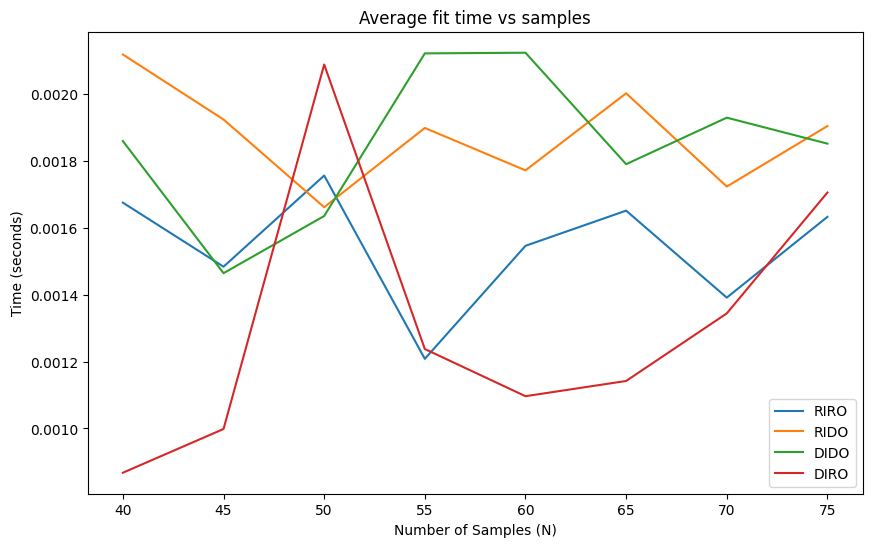

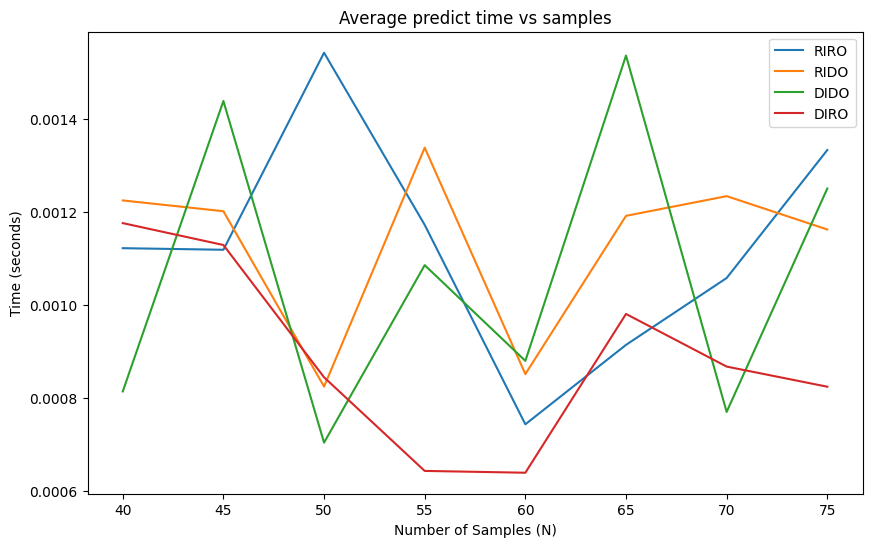

In [29]:

# Function to plot the results
plt.figure(figsize=(10, 6))
for case in ["RIRO", "RIDO", "DIDO", "DIRO"]:
    plt.plot(range(40, 80, 5), fit_times_all[case], label=f"{case}")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Time (seconds)")

plt.title("Average fit time vs samples")
plt.legend()
plt.show()

# Plotting results
plt.figure(figsize=(10, 6))
for case in ["RIRO", "RIDO", "DIDO", "DIRO"]:
    plt.plot(range(40, 80, 5), predict_times_all[case], label=f"{case}")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Time (seconds)")

plt.title("Average predict time vs samples")
plt.legend()
plt.show()